# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


#### Najpierw zobaczymy jaka była struktura pasażerów

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pclass         1046 non-null   float64 
 1   survived       1046 non-null   float64 
 2   name           1046 non-null   object  
 3   sex            1046 non-null   object  
 4   age            1046 non-null   float64 
 5   sibsp          1046 non-null   float64 
 6   parch          1046 non-null   float64 
 7   ticket         1046 non-null   object  
 8   fare           1045 non-null   float64 
 9   cabin          272 non-null    object  
 10  embarked       1044 non-null   object  
 11  boat           417 non-null    object  
 12  body           120 non-null    float64 
 13  home.dest      685 non-null    object  
 14  grupy_wiekowe  1046 non-null   category
 15  family_size    1046 non-null   float64 
dtypes: category(1), float64(8), object(7)
memory usage: 132.0+ KB


In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body,family_size
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000,1046.000000
mean,2.207457,0.408222,29.881135,0.502868,0.42065,36.686080,160.87500,0.923518
std,0.841497,0.491740,14.413500,0.912167,0.83975,55.732533,98.10392,1.452891
min,1.000000,0.000000,0.166700,0.000000,0.00000,0.000000,1.00000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000,10.000000


In [13]:
brakujace_wartosci= df.isnull()
brakujace_wartosci

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,grupy_wiekowe,family_size
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False


#### Widać że są brakujące wartości przy numerach kabin i łodzi ratunkowych. Są też brakuące numery ciał co oznacza, że pasażer nie przeżyłale ciało nie zostało odnalezione.  

<Axes: >

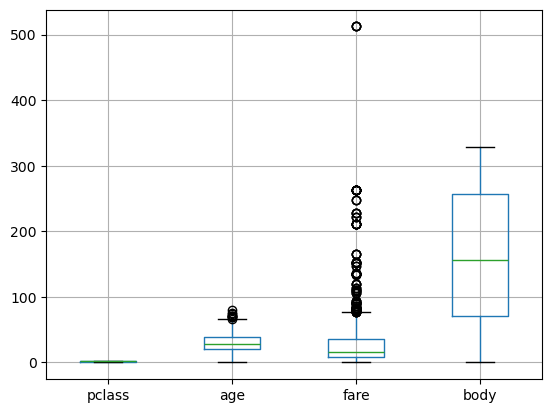

In [16]:
df.boxplot(column=['pclass' , 'age', 'fare', 'body'])

<Axes: >

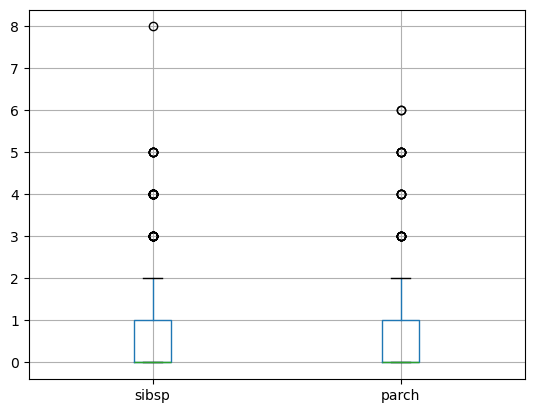

In [17]:
df.boxplot(column=['sibsp', 'parch' ])

##### Sprawdzenie wartości odstających (dla tych parametrów dla których ma to sens) bo dla niektórych parametrów typu imię, płeć, czy przeżył (0-1) nie ma to za bardzo sensu.

##### Widać, że pojawiają się wartości odstające. Można je zaobserwować zarówno  w pozycjach "wiek" oraz w "cenie biletu" - czyli widać, że była grupa bardzo drogich biletów i trochę pasażerów którzy wiekowo "odstawali" od większości. Ale widać również, że posiadanie wielu członków rodziny na pokładzie też nie było typowe i możan zakwalifikować jako wartość odstającą.

<Axes: >

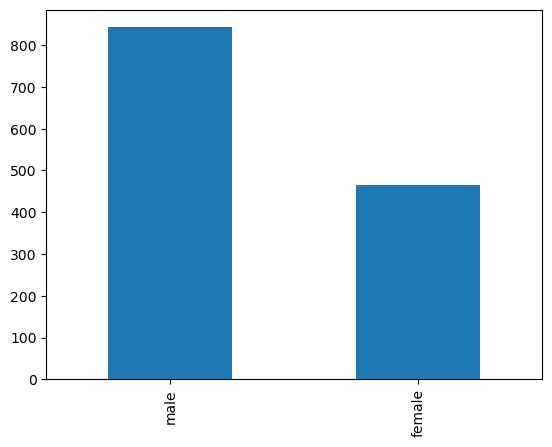

In [3]:
podzial_na_plec = df['sex'].value_counts()
podzial_na_plec.plot(kind='bar')

#### Na wykresie widać że na statku było dużo więcej mężczyzn niż kobiet

C:\Users\maciej.mazur\AppData\Local\Temp\ipykernel_47536\3006732908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grupy_wiekowe'] = pd.cut(df['age'],


<Axes: >

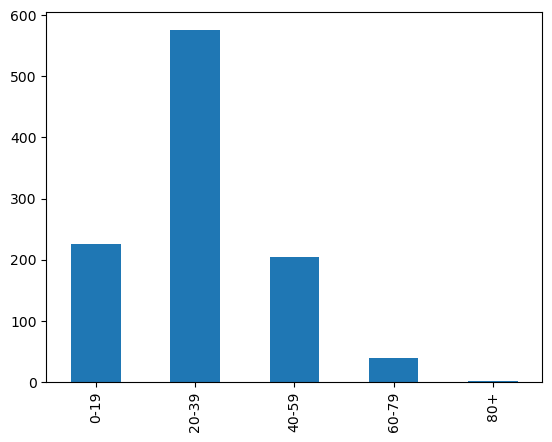

In [4]:
# Teraz sprawdzimy strukturę ze względu na wiek pasażerów
df = df.dropna(subset=['age'])

df['grupy_wiekowe'] = pd.cut(df['age'], 
                        bins=[0, 20, 40, 60, 80, 100], 
                        labels=['0-19', '20-39', '40-59', '60-79', '80+'], 
                        right=False)

df['grupy_wiekowe'].value_counts().sort_index().plot(kind='bar')


#### Będziemy teraz analizowali co mogło mieć wpływ na przeżywalność pasażerów

<Axes: xlabel='pclass'>

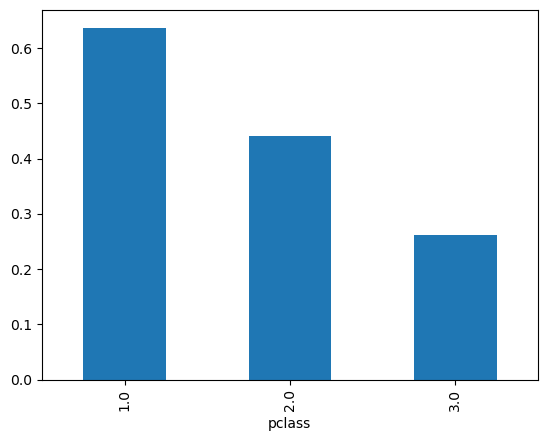

In [5]:
survival_rates = df.groupby('pclass')['survived'].mean()
survival_rates.plot(kind='bar', x='Ticket Class', y='Survival Rate')                         

#### Powyższy wykres pokazuje różnice w przeżywalności w zależności od klasy biletu i widać, że jest ona znacząca. W najwyższej klasie przeżywało ok 2 razy więcej pasażerów

C:\Users\maciej.mazur\AppData\Local\Temp\ipykernel_47536\389242228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibsp'] = df['sibsp'].fillna(0)
C:\Users\maciej.mazur\AppData\Local\Temp\ipykernel_47536\389242228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parch'] = df['parch'].fillna(0)
C:\Users\maciej.mazur\AppData\Local\Temp\ipykernel_47536\389242228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

<Axes: xlabel='family_size'>

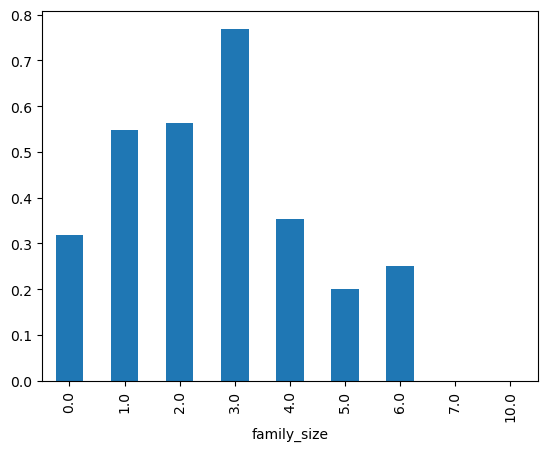

In [6]:
# Teraz sprawdzimy czy na przeżywalność miała wpływ rodzina która była na pokładzie

# Wypełniamy puuste pola i obliczamy ile rodziny byóło na pokładzie
df['sibsp'] = df['sibsp'].fillna(0)
df['parch'] = df['parch'].fillna(0)
df['survived'] = df['survived'].fillna(0)

df['family_size'] = df['sibsp'] + df['parch']

family_survival = df.groupby('family_size')['survived'].mean()
family_survival.plot(kind='bar', x='family size', y='Survival Rate')

<Axes: ylabel='sex'>

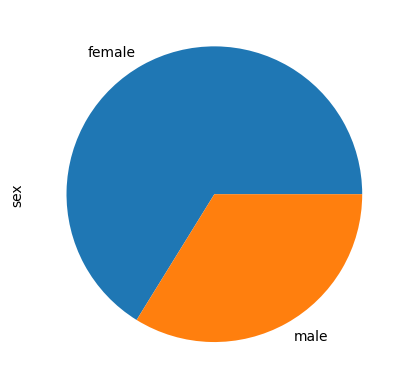

In [7]:
# Teraz sprawdzimy czy na łodziach ratunkowych było więcej kobiet czy mężczyzn

lodzie_df = df.dropna(subset=['boat'])

plec_na_lodziach = lodzie_df['sex'].value_counts()
plec_na_lodziach.plot(kind='pie', x='Gender', y='Count')

#### Widać że na łodziach ratunkowych było więcej kobiet

<Axes: ylabel='sex'>

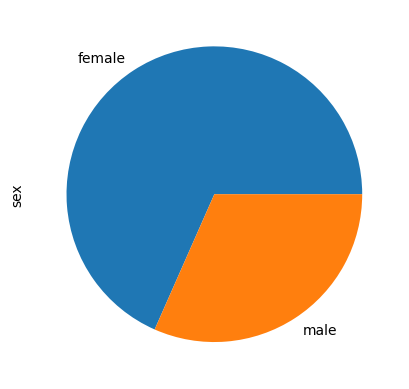

In [8]:
# To pokrywa sięz proporcją pasażerów którzy przeżyli
survivors = df[df['survived'] == 1]

plec_przezyla = survivors['sex'].value_counts()
plec_przezyla.plot(kind='pie', x='plec_przezyla', y='Count')

#### Widać również, że pasażerowie to osoby samotne lub pary a rodziny wieloosobowe należały do rzadkości.

#### Na podstawie przeanalizowanych danych widać zależności pomiędzy przeżywalnością pasażerów i płcią oraz związek z ilością pasażerów tej płci na szalupach ratunkowych (co jest logiczne ale chodziło o potwierdzenie tego na wykresach).

#### Widać również, że do pewnego momentu (przy zwiększaniu się uilości członków rodziny) przeżywalność się zwiekszała a następnie po przekroczeniu pewnego progu (4 osób) znacząco się obniżała.
#### Jeden z wykresów pokazuje różnice w przeżywalności w zależności od klasy biletu i łatwo wywnioskować, że zależnośc jest ona znacząca - w najwyższej klasie przeżywało ok 2 razy więcej pasażerów.